In [2]:
from os.path import join
from google.colab import drive
# Montar el DRIVE
ROOT = "/content/drive"
drive.mount(ROOT)# Apuntar a la carpeta de trabajo
PROJ = "My Drive/MSI-MSS_project" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.fftpack import fft
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap
from skimage.exposure import rescale_intensity
from PIL import Image
from sklearn.decomposition import PCA
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
set_completo = pd.read_pickle(join(PROJECT_PATH,'final_subset8mil_Color.pkl'))

In [0]:
set_completo["label"] = np.where((set_completo["label"]=="MSI"),0,1)

In [6]:
set_completo["label"].value_counts()

1    8000
0    8000
Name: label, dtype: int64

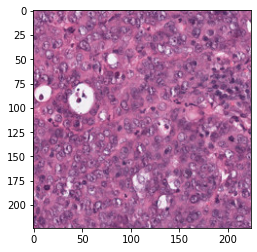

In [7]:
plt.imshow(set_completo["image_array"][8000])

In [8]:
y = np.array(set_completo["label"])
y

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
def sizeImage(series_value):
  return cv2.resize(series_value, (25,25), interpolation=cv2.INTER_AREA) 

In [0]:
set_completo["image_array_resize"] = set_completo["image_array"].apply(sizeImage)

In [0]:
def hemat(value):
  return rgb2hed(value)[:,:,0]

In [0]:
set_completo["image_array_resize"] = set_completo["image_array_resize"].apply(hemat)

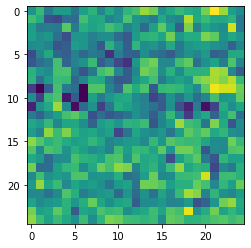

In [26]:
plt.imshow(set_completo["image_array_resize"][8000])

In [0]:
#def blur(value):
  #return cv2.bilateralFilter(value.astype("float32"),9,75,75)

In [0]:
#set_completo["image_array_resize"] = set_completo["image_array_resize"].apply(blur)

In [0]:
X = np.array(list(set_completo["image_array_resize"]))

In [28]:
X.shape

(16000, 25, 25)

In [0]:
X = X.reshape(X.shape[0], -1)

In [30]:
X.shape

(16000, 625)

In [0]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [32]:
models = {
    #"DecisionTree": DecisionTreeClassifier(),
    #"ExtraTree": ExtraTreeClassifier(),
    #"Dummy": DummyClassifier(),
    #"Gaussian": GaussianProcessClassifier(),
    #"Ada Boost": AdaBoostClassifier(),
    #"Bagging": BaggingClassifier(),
    #"ExtraTrees": ExtraTreesClassifier(),
    #"GradientBoosting" : GradientBoostingClassifier(),
    "RandomForest" : RandomForestClassifier(),
    #"HistGradientBoost": HistGradientBoostingClassifier(),
    }

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    try:
      model.fit(X_train, y_train)
    except:
      pass

Training model: RandomForest


In [33]:
d = {}
for modelName, model in models.items():
  try:
    d[modelName] = model.predict(X_test)
  except:
    pass
df = pd.DataFrame(d)
df["gt"] = y_test
df

,RandomForest,gt
0,1,1
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
3195,0,0
3196,1,1
3197,1,1
3198,0,0


In [34]:
for modelName, model in models.items():  
  try:  
    print(f"Evaluating model [{modelName}]:")
    print("Accuracy", accuracy_score(df["gt"], df[modelName]))
    print("Precision", precision_score(df["gt"], df[modelName]))
    print("Precision", precision_score(df["gt"], df[modelName], average='weighted'))
    print("Recall", recall_score(df["gt"], df[modelName]))
    print("Recall", recall_score(df["gt"], df[modelName], average='weighted'))
    print("F1Score",f1_score(df["gt"], df[modelName]),"\n")
  except:
    pass

Evaluating model [RandomForest]:
Accuracy 0.5521875
Precision 0.5424443106562312
Precision 0.5527382845827862
Recall 0.5724269377382465
Recall 0.5521875
F1Score 0.557032457496136 



In [0]:
def BnW(value):
  return cv2.cvtColor(value, cv2.COLOR_RGB2GRAY)

In [0]:
set_completo["bnw"] = set_completo["image_array"].apply(BnW)

In [0]:
def resizeImg(value):
  return cv2.resize(value, (100,100), interpolation=cv2.INTER_NEAREST)

In [0]:
set_completo["bnw_resize"] = set_completo["bnw"].apply(resizeImg)

In [0]:
def medianblur(value):
  return cv2.medianBlur(value.astype("float32"),3)

In [0]:
set_completo["blur"] = set_completo["bnw_resize"].apply(medianblur)

In [0]:
X = np.array(list(set_completo["blur"]))
X.shape

(16000, 100, 100)

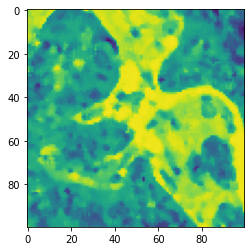

In [0]:
plt.imshow(X[10000])

In [0]:
X_dim = X.reshape(X.shape[0], -1)

In [0]:
X_dim.shape

(16000, 10000)

In [0]:
pca = PCA(n_components=50)
data_2d = pca.fit_transform(X_dim)

In [0]:
data_2d.shape

(16000, 50)

In [0]:
y=np.asarray(set_completo['label'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_2d, y, test_size=0.2)

In [0]:
model = RandomForestClassifier()

In [0]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=model.predict(X_test)

In [0]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall", recall_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred, average='weighted'))
print("F1Score",f1_score(y_test, y_pred),"\n")

Accuracy 0.530625
Precision 0.5195288282703038
Precision 0.5309606119993859
Recall 0.5354632587859425
Recall 0.530625
F1Score 0.5273757079924482 



,gt,predicted,proba MSI,proba MSS
0,1,0,0.55,0.45
1,0,1,0.43,0.57
2,0,0,0.64,0.36
3,1,1,0.44,0.56
4,1,0,0.63,0.37


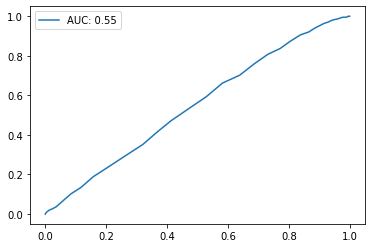

In [0]:
y_score = model.predict_proba(X_test)

#print(y_score)
roc = roc_curve(y_test, y_score[:,1])
display(pd.DataFrame({
    "gt":y_test,
    "predicted":y_pred,
    "proba MSI":y_score[:,0],
    "proba MSS":y_score[:,1]
}).head())

plt.plot(roc[0],roc[1])
plt.legend(["AUC: {}".format(round(roc_auc_score(y_test, y_score[:,1]),2))])

In [0]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,860,775
1,727,838
